# 📊 03 – Exploratory Data Analysis (EDA)

## 🔍 Purpose of This Notebook

This notebook explores our cleaned 2019 UK flat racing dataset to better understand the variables, distributions, and patterns it contains.

We're not building models yet — we're learning what the data says.

This helps us:
- Build domain intuition
- Spot potential issues, outliers, or biases
- Identify strong candidate features
- Refine our understanding before filtering or engineering

---

## 🧭 Why We're Starting Broad

Although our ultimate modelling goal is to predict elite races like the Epsom Derby, we begin with **broad EDA** over the full dataset.

This lets us:
- Get a high-level view of how horse races behave across all types
- Validate our data and assumptions globally
- Identify which features are strong, noisy, or redundant

Once we understand the full dataset, we’ll later **narrow the focus** to Derby-style races — filtering, adjusting, and analysing that specific subset with purpose.

---

## 📦 Data Inputs

We are using the cleaned horse-level dataset prepared in the previous notebook:
- `data/processed/horses_2019_clean.csv`

No race-level data is used yet — that will come later if needed.


## 📥 Step 1 – Load Cleaned Data

We begin by loading the cleaned horse-level data produced in the previous notebook.

This dataset:
- Covers the 2019 UK flat season
- Has had key issues resolved (e.g. mislabelled columns, placeholder values)
- Will be the foundation for all analysis going forward


In [1]:
import pandas as pd

# Load cleaned data
horses = pd.read_csv("data/processed/horses_2019_clean.csv")
print("✅ Cleaned horse-level data loaded:", horses.shape)

# Quick sanity check
horses.sample(5)


✅ Cleaned horse-level data loaded: (171849, 28)


,rid,horseName,age,saddle,implied_prob,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,did_finish
92489,134866,Calvados Spirit,6.0,10.0,0.125000,0,Richard Fahey,Paddy Mathers,2.0,1,...,72.0,Invincible Spirit,Putois Peace,Pivotal,10,1.154995,51,0.0,1,1
36766,130973,Invincible Missile,3.0,11.0,0.312500,0,W Y So,Joao Moreira,5.0,1,...,67.0,Smart Missile,Phaedra,Hussonet,14,1.224880,55,0.0,0,1
127491,156285,Central City,4.0,7.0,0.058824,0,Ian Williams,R P Walsh,4.0,3.25,...,77.0,Kodiac,She Basic,Desert Prince,7,1.140761,53,0.0,0,1
120683,122227,Master Of Reality,4.0,6.0,0.066667,0,Joseph Patrick O'Brien,Andrea Atzeni,5.0,shd,...,118.0,Frankel,L'Ancresse,Darshaan,10,1.195651,61,0.0,0,1
104012,148983,Caladiyna,4.0,8.0,0.021277,0,M Planard,Ioritz Mendizabal,7.0,.75,...,NaN,Poet's Voice,Clarinda,Montjeu,16,1.203265,58,0.0,0,1


## 🧱 Step 2 – Understand Dataset Structure

Before diving into relationships or trends, we take a broad look at the structure of the data.

We'll examine:
- Column data types
- Presence of missing values
- Basic summary statistics

This helps us:
- Spot any leftover cleaning issues
- Decide how to visualise or transform features later
- Prioritise which variables might need deeper inspection


In [2]:
# High-level structure
horses.info()

# Quick null count
print("\n🕳️ Null values per column:")
print(horses.isnull().sum().sort_values(ascending=False))

# Basic stats for numeric columns
horses.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171849 entries, 0 to 171848
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   rid           171849 non-null  int64  
 1   horseName     171849 non-null  object 
 2   age           171849 non-null  float64
 3   saddle        171739 non-null  float64
 4   implied_prob  171849 non-null  float64
 5   isFav         171849 non-null  int64  
 6   trainerName   171849 non-null  object 
 7   jockeyName    171849 non-null  object 
 8   position      163816 non-null  float64
 9   positionL     146630 non-null  object 
 10  dist          129373 non-null  object 
 11  weightSt      171849 non-null  int64  
 12  weightLb      171849 non-null  int64  
 13  overWeight    3184 non-null    float64
 14  outHandicap   3221 non-null    float64
 15  headGear      63377 non-null   object 
 16  RPR           153198 non-null  float64
 17  TR            108282 non-null  float64
 18  OR  

,rid,age,saddle,implied_prob,isFav,position,weightSt,weightLb,overWeight,outHandicap,RPR,TR,OR,runners,margin,weight,res_win,res_place,did_finish
count,171849.000000,171849.000000,171739.000000,171849.000000,171849.000000,163816.000000,171849.000000,171849.000000,3184.000000,3221.000000,153198.000000,108282.000000,101989.000000,171849.000000,171849.000000,171849.000000,171849.000000,171849.000000,171849.000000
mean,117721.128840,4.826313,6.518851,0.120026,0.106774,5.981925,9.194706,6.066564,1.451633,3.462900,74.054746,48.638204,81.516311,11.387503,1.215121,60.643873,0.100437,0.275800,0.953255
std,44980.871829,2.159873,4.202446,0.118543,0.308827,3.865870,1.056362,4.088370,0.733934,4.174487,28.783986,27.272410,26.270792,3.950080,0.081930,6.602530,0.300583,0.446918,0.211092
min,3.000000,2.000000,0.000000,0.001767,0.000000,1.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.006608,43.000000,0.000000,0.000000,0.000000
25%,99508.000000,3.000000,3.000000,0.038462,0.000000,3.000000,8.000000,2.000000,1.000000,1.000000,54.000000,28.000000,61.000000,8.000000,1.169079,56.000000,0.000000,0.000000,1.000000
50%,129858.000000,4.000000,6.000000,0.083333,0.000000,5.000000,9.000000,6.000000,1.000000,2.000000,73.000000,46.000000,77.000000,11.000000,1.201140,58.000000,0.000000,0.000000,1.000000
75%,151567.000000,6.000000,9.000000,0.163934,0.000000,8.000000,10.000000,10.000000,2.000000,5.000000,94.000000,65.000000,99.000000,14.000000,1.243472,67.000000,0.000000,1.000000,1.000000
max,172742.000000,16.000000,40.000000,0.961538,1.000000,30.000000,12.000000,13.000000,7.000000,43.000000,181.000000,177.000000,177.000000,40.000000,2.552799,79.000000,1.000000,1.000000,1.000000


## 🧠 Structural Observations

- The dataset contains **171,849 rows** and **28 columns**, as expected — one row per runner per race.
- No encoding or formatting issues were detected during loading.

### 🕳️ Missing Values

- Several fields have **significant null counts**, especially:
  - `overWeight`, `outHandicap`, and `headGear` — missing in most rows (likely due to infrequent application)
  - `OR`, `TR`, `RPR` — many missing values, which aligns with how ratings are assigned (e.g. only to UK races or qualified horses)
  - `positionL` and `dist` — these are “distance beaten” style metrics, and often absent for non-finishers
- `position` has **8,033 nulls**, which we've previously identified as non-finishers.
- Other core fields like `implied_prob`, `age`, `trainerName`, and `jockeyName` are **complete** and ready for use.

---

### 🔢 Variable Types

- Most columns are typed as expected (e.g. `float64` for continuous numbers, `object` for text).
- We’ve retained `position` as a `float64` due to the `NaN` entries — this allows clean handling of non-finishers.
- Categorical fields like `trainerName`, `jockeyName`, and `headGear` are stored as strings for now. We’ll consider encoding them later if useful for modelling.

---

### ✅ Next Step

We now move on to explore **key variable distributions**, starting with numeric columns like:

- `implied_prob`
- `age`
- `OR`, `RPR`, `TR`

This helps identify which features are meaningful and how they behave across the dataset.


## 📊 Step 3 – Distributions of Key Numeric Features

We now explore how important numeric variables are distributed.

This helps us:
- Spot skewed or bimodal data
- Understand variable ranges and scale
- Compare against domain expectations

We'll start with:
- `implied_prob` – market's expected win chance
- `age` – runner age (should skew young)
- `OR`, `RPR`, `TR` – official and performance ratings


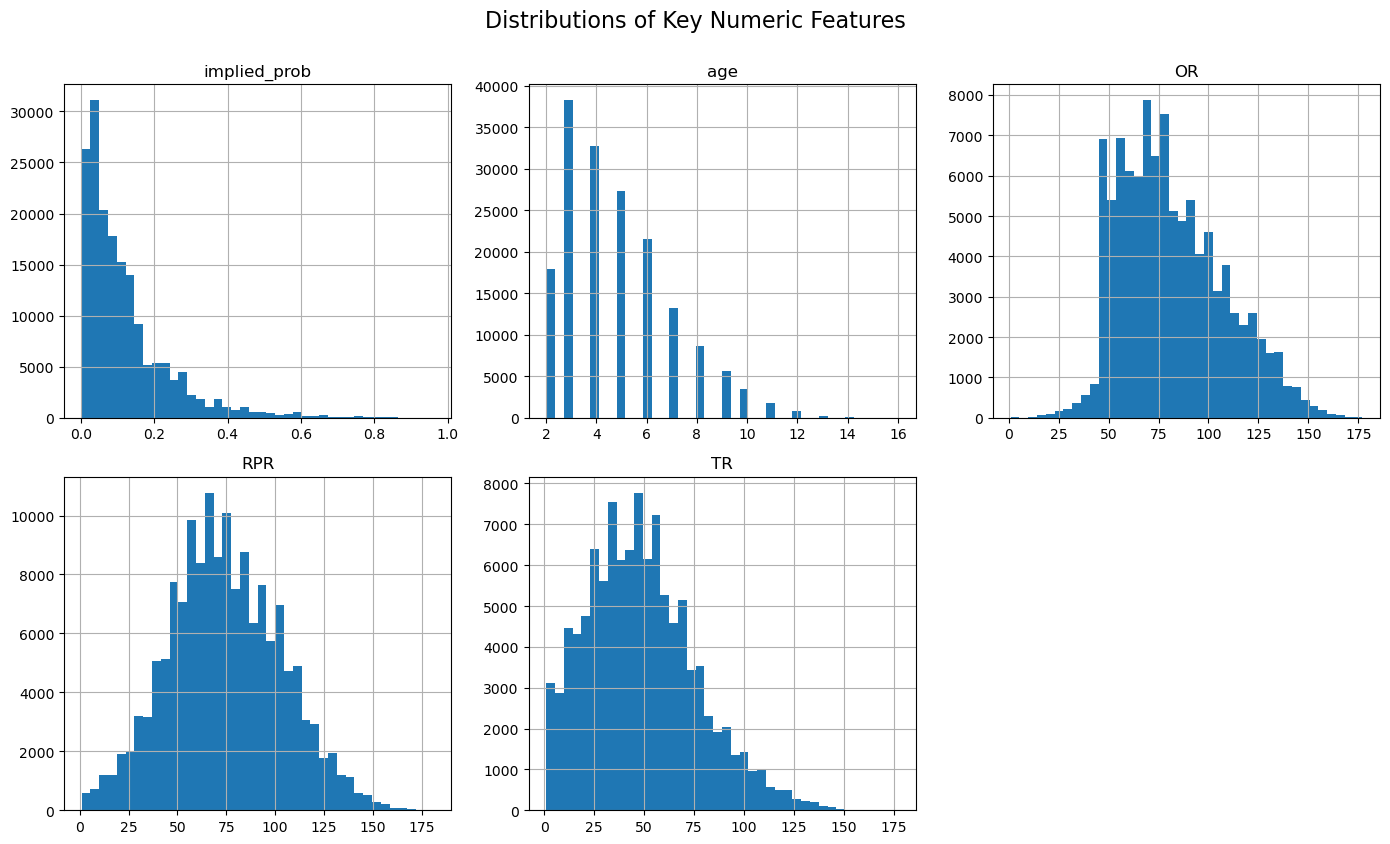

In [3]:
import matplotlib.pyplot as plt

numeric_cols = ['implied_prob', 'age', 'OR', 'RPR', 'TR']
horses[numeric_cols].hist(bins=40, figsize=(14, 8), layout=(2, 3))
plt.tight_layout()
plt.suptitle("Distributions of Key Numeric Features", fontsize=16, y=1.05)
plt.show()


## 🔎 Observations from Numeric Distributions

### 🎲 `implied_prob`
- Strongly right-skewed, as expected — most horses are longshots.
- The bulk of the field has a <10% win probability.
- A small tail of strong favourites appears above 0.5.

### 🐴 `age`
- Peaks at ages 3–4, tapering off gradually after age 6.
- Reflects the mix of flat and jump racing:
  - Flat racers typically peak between ages 2–5.
  - Jump horses often run well into their teens.
- The long tail (up to age 16) is consistent with known examples of veteran jumpers.

### 🏇 Ratings (`OR`, `RPR`, `TR`)
- All three follow roughly normal (or bell-like) distributions, centered around:
  - `OR`: ~75
  - `RPR`: ~73
  - `TR`: ~50
- This suggests they are consistently scaled, but not necessarily equivalent.
- Slight right skew in `OR` implies a long tail of elite-rated horses.

### ⚠️ Notes
- There’s no evidence of broken or extreme outliers in these distributions.
- All fields look numerically stable and ready for downstream use.

---

✅ We’ll revisit these later when we assess their predictive value — for now, they look clean and trustworthy.


## 🎯 Step 4 – Define Outcome Flags

To analyse outcomes and train models, we define binary indicators for each horse’s result in the race.

### ✅ Existing Columns
These are already included in the dataset:
- `res_win`: 1 if the horse won, 0 otherwise
- `res_place`: 1 if the horse placed (usually top 3, but varies by field size and rules)

These are useful for evaluating betting returns or market calibration.

---

### 🛠️ Derived Columns

We also define two custom flags:
- `is_winner`: True if `position == 1` (finished first)
- `did_finish`: True if the horse has a valid finishing position (i.e. not pulled up, unseated, etc.)

Why create `is_winner` if we already have `res_win`?

- For this dataset, `res_win` and `position == 1` are effectively equivalent — including dead heats.
- We define `is_winner` explicitly from `position` to:
  - Make our modelling logic transparent
  - Ensure consistency with how we handle `did_finish`
  - Keep control over how we define "win" in future filters or derived logic

Having both columns also lets us double-check for unexpected discrepancies.

These flags will make it easier to:
- Explore variable behaviour by outcome
- Train binary classifiers
- Segment data by finish quality


In [4]:
# 1 = winner, 0 = otherwise
horses['is_winner'] = (horses['position'] == 1).astype(int)

# Already created earlier, but re-assert for clarity
horses['did_finish'] = horses['position'].notna().astype(int)

# Confirm creation
print("🏆 is_winner value counts:")
print(horses['is_winner'].value_counts())

print("\n🏁 did_finish value counts:")
print(horses['did_finish'].value_counts())


🏆 is_winner value counts:
is_winner
0    154589
1     17260
Name: count, dtype: int64

🏁 did_finish value counts:
did_finish
1    163816
0      8033
Name: count, dtype: int64


## 📊 Outcome Flag Summary

### 🏆 `is_winner`
- 17,260 horses finished in **1st place**
- This accounts for approx. 10%  of the dataset, which aligns with typical field sizes (~10 runners per race)
- These will be our "positive class" when training win-prediction models

### 🏁 `did_finish`
- 163,816 horses had a valid finishing position (`did_finish = 1`)
- 8,033 entries had `position = NaN`, meaning they did **not finish** (e.g. pulled up, fell, unseated)
- These horses will be **excluded** from modelling where a valid outcome is required

✅ These flags will be used throughout our analysis and modelling pipeline.


## 🔍 Step 5 – How Do Features Relate to Winners?

Now that we’ve defined outcome flags, we want to understand how certain features behave **for winners vs non-winners**.

This helps us:
- Spot predictive signals early
- See whether the market (via `implied_prob`) aligns with actual results
- Validate that variables like `OR`, `RPR`, and `age` have usable structure

We'll start by comparing distributions for:
- `implied_prob` (market expectation)
- `OR`, `RPR`, `TR` (ratings)
- `age` (basic runner trait)


## 📘 Step 5.1 – Explore `implied_prob` vs `is_winner`

We start our feature-vs-outcome exploration by comparing **implied probability** between winning and non-winning horses.

This variable represents the market’s belief (based on bookmaker odds) that a horse will win. If it’s a good predictor, we should see a clear difference in distributions between winners and non-winners.


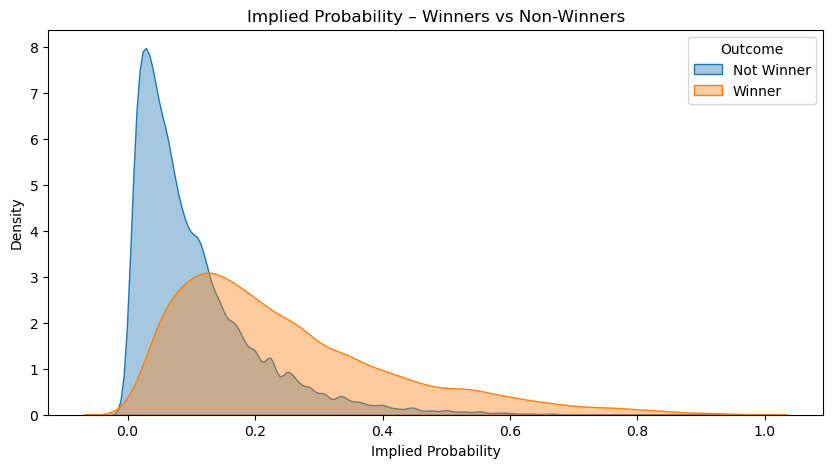

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare clean subset
subset = horses[(horses['did_finish'] == 1) & (horses['is_winner'].isin([0, 1]))].copy()

plt.figure(figsize=(10, 5))

# Plot each group manually with label
for label, group in subset.groupby('is_winner'):
    label_name = "Winner" if label == 1 else "Not Winner"
    sns.kdeplot(
        group['implied_prob'],
        fill=True,
        alpha=0.4,
        label=label_name
    )

plt.title("Implied Probability – Winners vs Non-Winners")
plt.xlabel("Implied Probability")
plt.ylabel("Density")
plt.legend(title="Outcome")
plt.show()


## 📊 What the Chart Shows – `implied_prob`

- **Winners** (green curve) tend to have higher implied probabilities — the market expected them to win more often.
- **Non-winners** (blue curve) dominate at lower implied probabilities.
- There’s a strong split between the two groups, especially above 0.2 — most winners come from horses the market believed had a solid chance.

✅ This confirms that **the market’s odds contain valuable information**, and `implied_prob` will be one of our most predictive features.


## 🏇 Step 5.2 – Explore `OR` vs `is_winner`

The `OR` (Official Rating) is assigned by the British Horseracing Authority (BHA) and is meant to represent a horse's ability.

Higher-rated horses should, in theory, have a greater chance of winning — so we want to visualise how `OR` varies between winners and non-winners.

This helps us evaluate how much "skill" this metric captures.


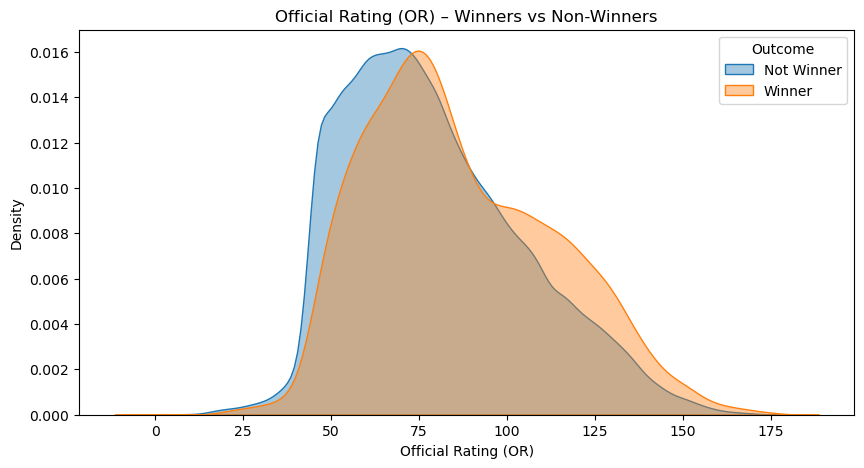

In [14]:
# Plot OR distribution manually for each group
plt.figure(figsize=(10, 5))

for label, group in subset.dropna(subset=['OR']).groupby('is_winner'):
    label_name = "Winner" if label == 1 else "Not Winner"
    sns.kdeplot(
        group['OR'],
        fill=True,
        alpha=0.4,
        label=label_name
    )

plt.title("Official Rating (OR) – Winners vs Non-Winners")
plt.xlabel("Official Rating (OR)")
plt.ylabel("Density")
plt.legend(title="Outcome")
plt.show()


## 📊 What the Chart Shows – `OR`

- **Winners** tend to have higher `OR` values on average than non-winners.
- The distributions overlap, but the winner curve shifts slightly to the right.
- This suggests that while **OR is not deterministic**, it **is positively correlated with winning**.

✅ `OR` will likely be a useful feature, though not as predictive as market-based variables like `implied_prob`.


## 📰 Step 5.3 – Explore `RPR` vs `is_winner`

`RPR` (Racing Post Rating) is an independent rating published by the Racing Post, intended to estimate a horse's performance in a given race.

It’s not an official BHA figure, but often tracks with outcomes. We’ll explore whether higher `RPR` scores are associated with winners.

Because RPR is assigned *after* the race, we’ll treat it cautiously for modelling (it may leak outcome information) — but it’s still useful for benchmarking.


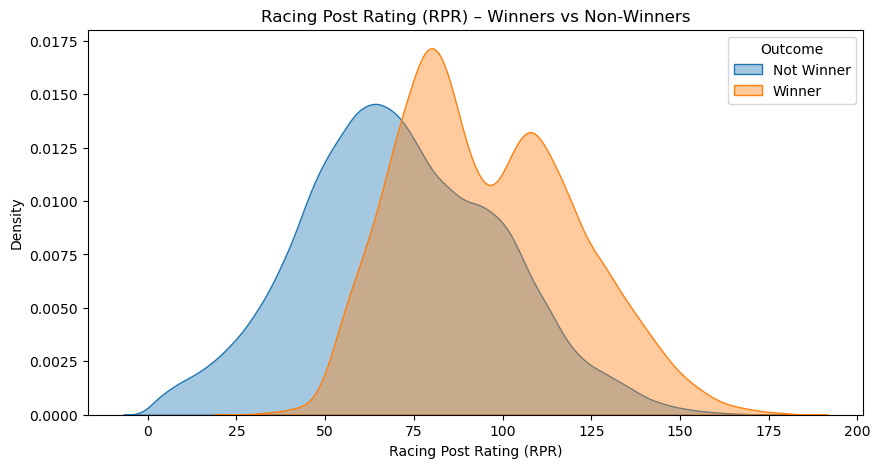

In [17]:
# Plot RPR distribution manually for each group
plt.figure(figsize=(10, 5))

for label, group in subset.dropna(subset=['RPR']).groupby('is_winner'):
    label_name = "Winner" if label == 1 else "Not Winner"
    sns.kdeplot(
        group['RPR'],
        fill=True,
        alpha=0.4,
        label=label_name
    )

plt.title("Racing Post Rating (RPR) – Winners vs Non-Winners")
plt.xlabel("Racing Post Rating (RPR)")
plt.ylabel("Density")
plt.legend(title="Outcome")
plt.show()


## 📊 What the Chart Shows – `RPR`

- The distribution for **winners** is clearly shifted to the right — they typically have much higher RPRs than non-winners.
- This confirms that **RPR strongly reflects actual race performance** and aligns with observed outcomes.
- However, because RPR is calculated *after* the race based on how the horse performed, it introduces **outcome-based bias**.

⚠️ We’ll likely **exclude RPR from pre-race modelling** to avoid data leakage, but keep it for:
- Post-race sanity checks
- Benchmarking model performance
- Exploratory or retrospective analysis



## 🏃 Step 5.4 – Explore `TR` vs `is_winner`

`TR` stands for **TopSpeed Rating** — it’s a rating produced by the Racing Post, based purely on the horse’s time performance relative to standard times and race conditions.

Like `RPR`, it is calculated after the race and often correlates with outcomes. But because it's derived more mechanically from time, it may offer different insight.

We'll visualise how `TR` differs between winners and non-winners.


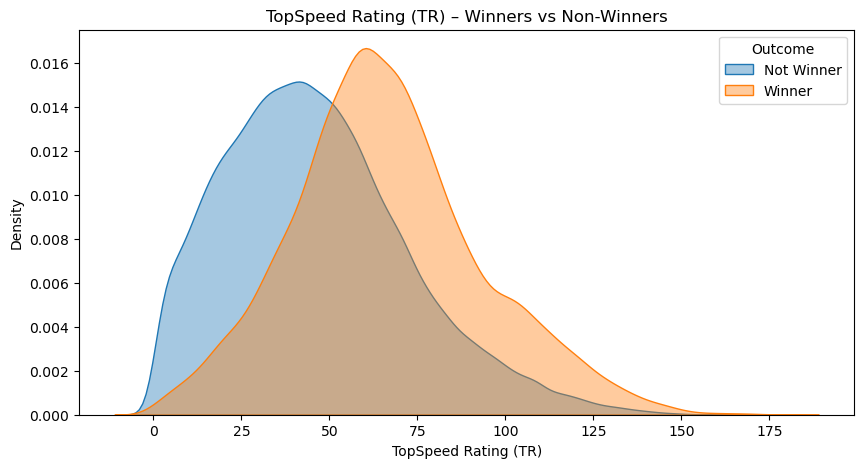

In [18]:
# Plot TR distribution manually for each group
plt.figure(figsize=(10, 5))

for label, group in subset.dropna(subset=['TR']).groupby('is_winner'):
    label_name = "Winner" if label == 1 else "Not Winner"
    sns.kdeplot(
        group['TR'],
        fill=True,
        alpha=0.4,
        label=label_name
    )

plt.title("TopSpeed Rating (TR) – Winners vs Non-Winners")
plt.xlabel("TopSpeed Rating (TR)")
plt.ylabel("Density")
plt.legend(title="Outcome")
plt.show()


## 📊 What the Chart Shows – `TR`

- **Winners** have slightly higher `TR` scores on average, but the separation is less pronounced than with `RPR`.
- Both distributions are fairly wide and overlapping — especially for lower-rated horses.
- This suggests `TR` is a **weaker proxy for overall ability** compared to `RPR` or `OR`, but still loosely aligned with winning.

⚠️ Like `RPR`, we’ll likely **exclude `TR` from pre-race modelling** due to its post-race nature — but it remains useful for analysing **how fast a horse actually ran**, even if it didn’t win. This helps us understand racing performance beyond just finish position.



## 🐴 Step 5.5 – Explore `age` vs `is_winner`

Age is a fundamental variable in horse racing. In flat racing, younger horses (typically 2–5 years old) tend to dominate due to speed and progression, while older horses may carry experience but often decline in ability.

We’ll visualise the relationship between age and win rate, to see if any clear patterns emerge — and to confirm whether age is likely to be a useful feature.


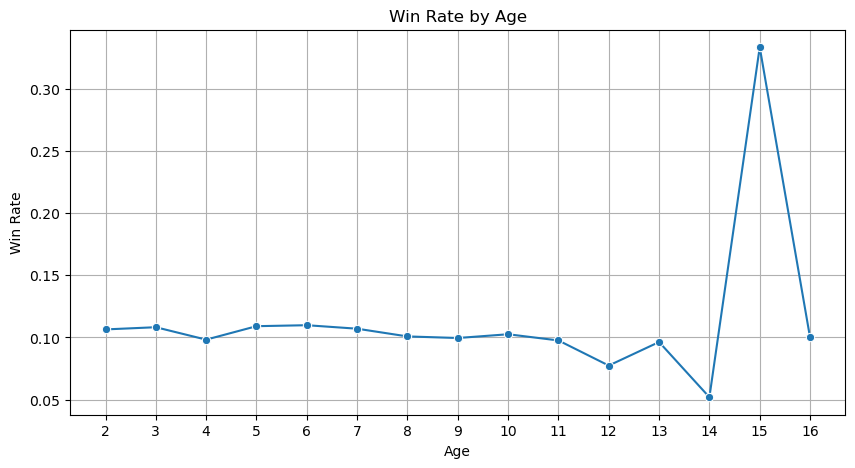

In [19]:
# Create a win rate by age
age_winrate = (
    subset.groupby('age')['is_winner']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'runners', 'sum': 'winners'})
)
age_winrate['win_rate'] = age_winrate['winners'] / age_winrate['runners']

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=age_winrate, x=age_winrate.index, y='win_rate', marker='o')
plt.title("Win Rate by Age")
plt.xlabel("Age")
plt.ylabel("Win Rate")
plt.xticks(age_winrate.index.astype(int))
plt.grid(True)
plt.show()


## 📊 What the Chart Shows – `age`

- Win rates are remarkably stable across horses aged 2 to 11, generally hovering around 10%.
- There is **no clear age group that dominates** in terms of win percentage.
- Spikes at ages 15 and 16 are likely due to **very small sample sizes**, and shouldn't be interpreted as meaningful trends.
- This suggests age alone is **not a strong predictor** of race outcomes — but may still interact meaningfully with other features (e.g. class, distance).


🧠 Note on Older Horses:
The consistent win rates across older horses reflect **survivorship bias** — only the most capable, sound, and competitive older horses are still racing. Less able horses typically retire earlier, meaning the older cohort is self-selecting and unusually strong relative to their age.
Age may not be a powerful standalone predictor, but it's still important to retain it — especially for interaction effects.

## 🧭 Step 5.6 – Explore `runners` vs `is_winner`

Each horse record includes a `runners` column — the total number of runners in that race. This directly affects the difficulty of winning.

We expect that:
- In smaller fields, a horse’s chance of winning is naturally higher.
- In larger fields, win probability per horse decreases.

This relationship also helps us understand **baseline probabilities** (e.g. 1 in 10 horses = 10% win rate).

Let’s visualise this to confirm.


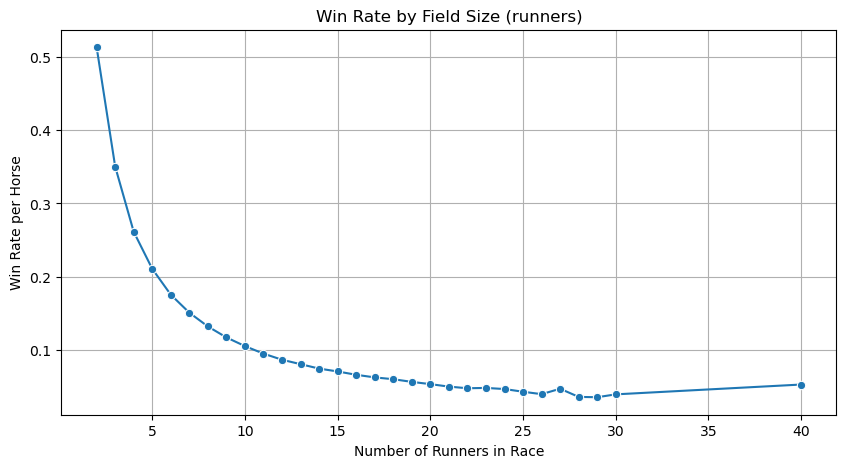

In [22]:
# Create win rate by runners
runners_winrate = (
    subset.groupby('runners')['is_winner']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'races', 'sum': 'winners'})
)
runners_winrate['win_rate'] = runners_winrate['winners'] / runners_winrate['races']

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=runners_winrate, x=runners_winrate.index, y='win_rate', marker='o')
plt.title("Win Rate by Field Size (runners)")
plt.xlabel("Number of Runners in Race")
plt.ylabel("Win Rate per Horse")
plt.grid(True)
plt.show()


📉 Win Rate vs. Field Size

As expected, win rates decrease as the number of runners in a race increases. This aligns with simple probability — each horse has a lower chance of winning in larger fields.

- In 2-runner races, each horse has ~50% chance (by definition).
- In 10-runner races, win rate averages ~10%.
- In very large fields (30+), win probability per horse drops below 5%.

This gives us a useful **baseline expectation**: even before considering form or ratings, the size of the field strongly affects each horse’s raw chance of winning.


### 🧑‍🏫 Trainer Performance – Win Rate Analysis

Not all trainers are equal. Some have higher strike rates due to better horses, tactics, resources, or entry selection.

In this step, we:
- Calculate the win rate for each trainer
- Focus on the top 30 trainers by number of runners
- Plot their win percentages for easy comparison

This helps us identify standout trainers — and see which ones might be over- or underperforming relative to expectations.


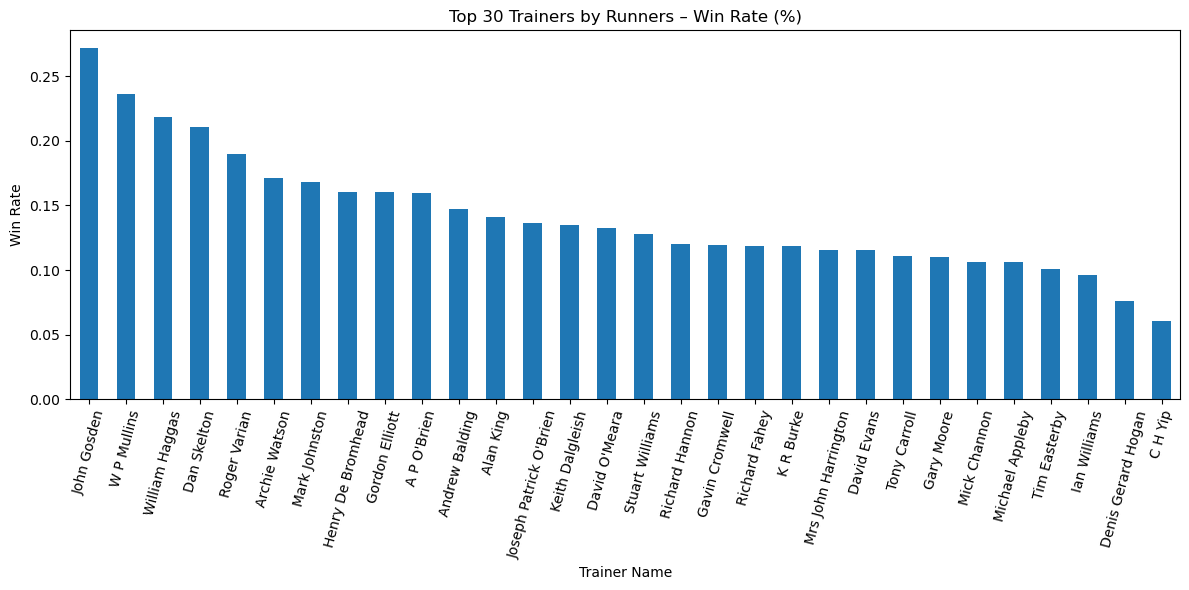

In [24]:
import matplotlib.pyplot as plt

# Filter: only horses that finished and have a recorded trainer
df = horses[horses['did_finish'] == 1]

# Count races and wins per trainer
trainer_stats = (
    df.groupby('trainerName')
    .agg(
        runs=('rid', 'count'),
        wins=('res_win', 'sum')
    )
)

trainer_stats['win_rate'] = trainer_stats['wins'] / trainer_stats['runs']

# Get top 30 by number of runners
top_trainers = trainer_stats.sort_values('runs', ascending=False).head(30)

# Plot
plt.figure(figsize=(12, 6))
top_trainers.sort_values('win_rate', ascending=False)['win_rate'].plot(kind='bar')
plt.title('Top 30 Trainers by Runners – Win Rate (%)')
plt.ylabel('Win Rate')
plt.xlabel('Trainer Name')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


### 🧑‍🏫 Trainer Impact on Win Rate

This chart displays the **top 30 trainers by number of runners** in the 2019 season, sorted by their **win rate (% of horses winning a race)**.

#### 💡 Key Observations
- **John Gosden** leads the pack with a win rate of ~27% — nearly three times the average.
- **W P Mullins** and **William Haggas** also show strong win rates, suggesting high-quality operations.
- High-volume trainers like **Mark Johnston** and **Richard Fahey** appear lower in win rate, possibly due to less selectivity or more mid-tier entries.
#### Key Notes:
- Trainers like **John Gosden** and **William Haggas** win with high consistency — markets usually price this in.
- But others like **Denis Gerard Hogan** or **C H Yip** show lower strike rates, even with large numbers of entries — potential overbet trainers?
- Understanding trainer intent and entry strategy can be a powerful edge — especially in handicaps.

#### 🧠 Why This Matters
Trainer performance is a meaningful signal in racing models. A trainer's ability to place horses in winnable races can significantly affect outcomes.

In predictive modelling, trainer strength may be captured by:
- Overall win rate
- Win rate by course or class
- Recent form (e.g. last 30 days)
- Trainer–jockey combinations

This kind of domain insight helps bridge raw stats with real-world racing dynamics.


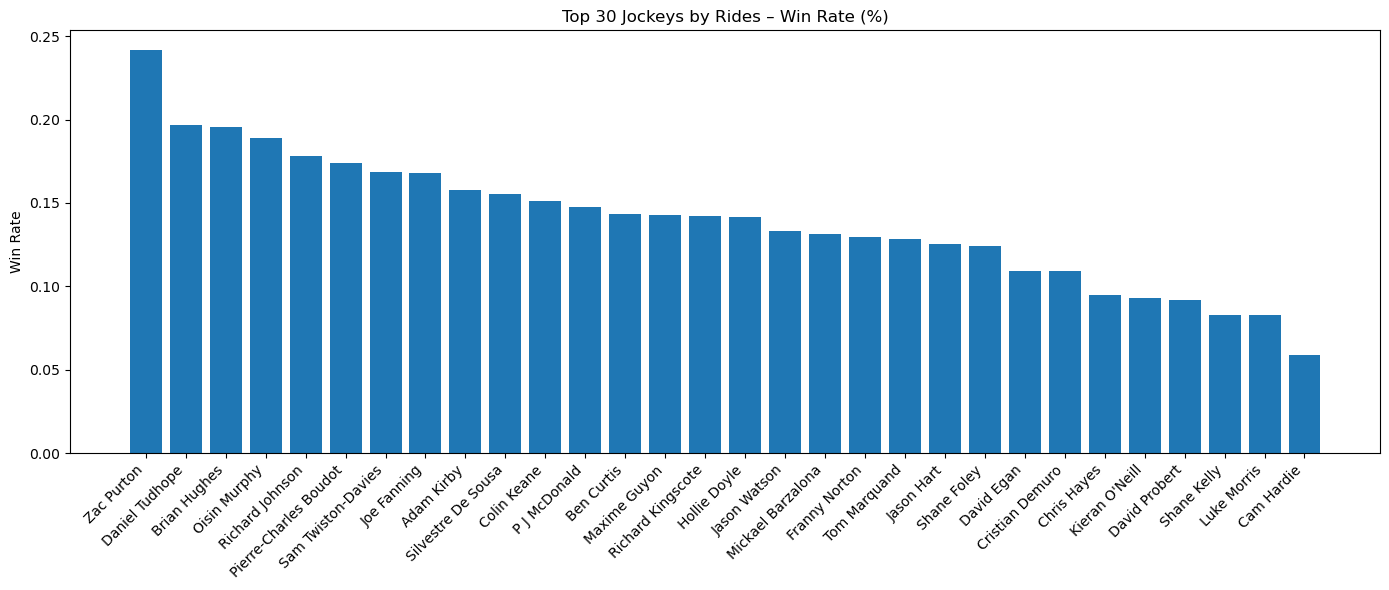

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate win rates per jockey
jockey_win_rates = (
    horses.groupby("jockeyName")["res_win"]
    .agg(["count", "sum"])
    .rename(columns={"count": "rides", "sum": "wins"})
)
jockey_win_rates["win_rate"] = jockey_win_rates["wins"] / jockey_win_rates["rides"]

# Select top 30 jockeys by number of rides
top_jockeys = jockey_win_rates.sort_values("rides", ascending=False).head(30)

# Sort by win rate for clearer plot
top_jockeys = top_jockeys.sort_values("win_rate", ascending=False)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(top_jockeys.index, top_jockeys["win_rate"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Win Rate")
plt.title("Top 30 Jockeys by Rides – Win Rate (%)")
plt.tight_layout()
plt.show()


### 🧠 Jockey Win Rate – Data Science & Bettor Perspective

This chart presents the **win rate of the top 30 jockeys by number of rides** in our 2019 flat racing dataset.

---

#### 🎯 From a Data Science Perspective:
- **Categorical Strength**: Jockey is a categorical feature with thousands of unique values. Summarising performance like this helps us decide whether to:
  - One-hot encode top jockeys  
  - Use target encoding  
  - Or treat jockeys as noise if predictive power is low
- **Signal vs. Noise**: High win rate can reflect either **jockey skill** or **mount quality**. It's important to disentangle the two to avoid introducing *leakage* or bias in modelling.
- **Next Step**: Test whether adding jockey identity actually improves model accuracy or if trainer/form/odds already subsume the signal.

---

#### 💰 From a Bettor’s Perspective:
- **Top jockeys often ride better horses** — but not always. Public perception and trainer preference also matter.
- **Sharp bettors** may look for:
  - Overrated jockeys on underpriced horses  
  - Underrated riders offering value when paired with strong trainers or lightly raced horses
- **Important Contexts**:
  - Some jockeys excel at specific courses or race types (e.g. sprints vs. staying races)
  - Others may have strong trainer partnerships or seasonal patterns

---

✅ This feature is worth exploring in more detail — especially when combined with trainer or course data.


## 🧭 What This General EDA Was For

This notebook was never about modelling — it was about **building trust in our dataset**.

Before we create features, fit models, or make predictions, we need to understand:

- ✅ What’s in the data (and what’s not)
- ✅ What’s clean, useful, or broken
- ✅ What major patterns exist (e.g. age, odds, trainers)
- ✅ What features may carry predictive signal
- ✅ What to flag now, and what to explore later

This is **standard practice in data science** — and even more important in betting, where:

- Fields can contain **post-race leakage** (e.g. ratings)
- Odds require **careful interpretation**
- Domain knowledge (like racing rules) matters a lot

We now have a strong foundation — clean, trusted data — and a clearer sense of which features and strategies to explore next.